In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Objective:
Cluster gene expression data from canine T-zone lymphoma and train classifiers on it. Then apply these classifiers to nanostring gene expression data 
## Data information:
## RNA-Seq
All samples are from differtent dogs. Tzone libraries are stranded and control libraries are not. They were sequenced on an Illumina HiSeq2500 with the 2x150BP program.
* Control Samples
1. Sorted normal CD4<sup>+</sup> T-cells (Samples start with "CD4_")
2. Sorted normal CD8<sup>+</sup> T-cells (Samples start with "CD8_")
* T-zone Lymphoma Sample
1. Sorted CD8<sup>+</sup> T-zone cells (Samples start with "TZL")



First I need to generate labels. I first tried hierarchical clustering using the seaborn clustermap function.

In [4]:
#What the data looks like
rnas=pd.read_csv("https://raw.githubusercontent.com/evcon131/cs345finalp/main/rnaseqdata.csv")
print(rnas.columns)
rnas.head()

Index(['Unnamed: 0', 'CD8_CI107031', 'CD8_CI107032', 'CD8_CI63491',
       'CD4_CI107029', 'CD4_CI63500', 'CD4_CI77877', 'CD4_CI80398', 'TZL36988',
       'TZL37555', 'TZL38094', 'TZL39204', 'TZL39964', 'TZL40699', 'TZL72752',
       'FDR_tzn_cd8', 'FDR_tzn_cd4', 'FDR_CD8_CD4', 'cd8_mean', 'cd4_mean',
       'tzn_mean', 'l2fc_tzn_cd8', 'l2fc_tzn_cd4', 'l2fc_cd8_cd4', 'symbol',
       'uniprot_sym', 'hgnc_sym'],
      dtype='object')


,Unnamed: 0,CD8_CI107031,CD8_CI107032,CD8_CI63491,CD4_CI107029,CD4_CI63500,CD4_CI77877,CD4_CI80398,TZL36988,TZL37555,...,FDR_CD8_CD4,cd8_mean,cd4_mean,tzn_mean,l2fc_tzn_cd8,l2fc_tzn_cd4,l2fc_cd8_cd4,symbol,uniprot_sym,hgnc_sym
0,ENSCAFG00000000001,0.000000,0.000000,0.000000,0.608668,0.000000,0.000000,0.000000,1.416440,2.275070,...,NaN,1.000000,0.152167,4.350906,2.121316,4.837589,2.716273,ENPP1,ENPP1,NaN
1,ENSCAFG00000000005,5.289699,0.869067,3.000856,1.826004,6.661359,0.000000,3.240284,5.665761,1.137535,...,0.980461,3.053207,2.931911,1.631726,-0.903927,-0.845443,0.058484,NaN,PARD6G,NaN
2,ENSCAFG00000000007,1071.164097,1003.772023,1086.309913,964.129861,1152.415028,817.502002,959.772009,538.247274,539.191638,...,0.726817,1053.748678,973.454725,573.557786,-0.877520,-0.763175,0.114345,ADNP2,ADNP2,NaN
3,ENSCAFG00000000008,350.001767,396.294409,279.079619,314.072606,287.390040,374.828362,333.749213,518.417111,528.953822,...,0.910252,341.791931,327.510055,481.850098,0.495466,0.557045,0.061579,TXNL4A,TXNL4A,NaN
4,ENSCAFG00000000009,515.745676,584.881880,569.162376,832.048939,606.183627,766.450110,596.212186,1322.955142,1737.016099,...,0.163808,556.596644,700.223716,1572.750107,1.498585,1.167402,-0.331184,SLC66A2,SLC66A2,NaN


/usr/local/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


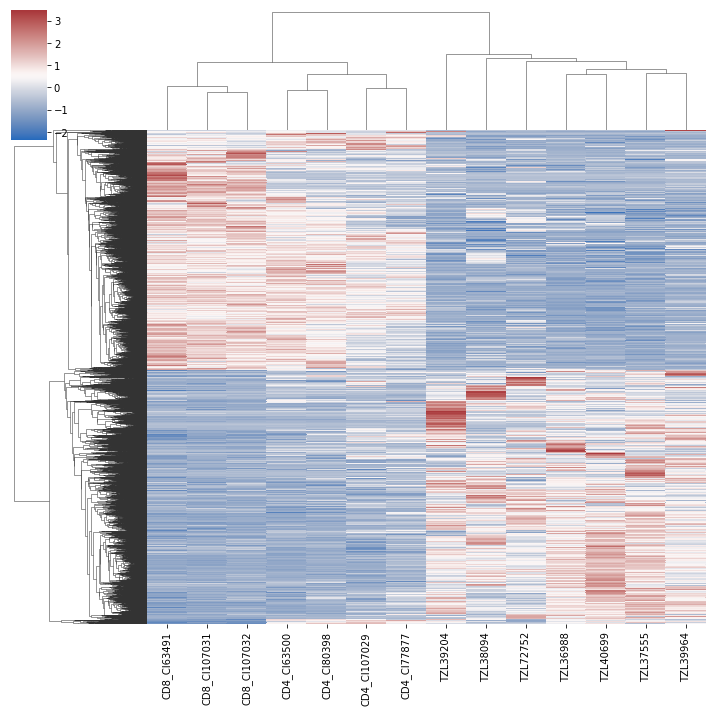

In [5]:
from sklearn import cluster
rnas=pd.read_csv("https://raw.githubusercontent.com/evcon131/cs345finalp/main/rnaseqdata.csv")
#Filter on threshhold FDR < .05
rnas=rnas[rnas["FDR_tzn_cd8"] < .05]
X=rnas.iloc[:,1:15]
sns.clustermap(rnas.iloc[:,1:15],
               z_score=0, 
               cmap="vlag",
               yticklabels=False)


As shown above, hierarchical clustering more or less clustered genes into up and down regulated genes. Since that is not terribly informative, I tried k-means clustering.

/usr/local/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


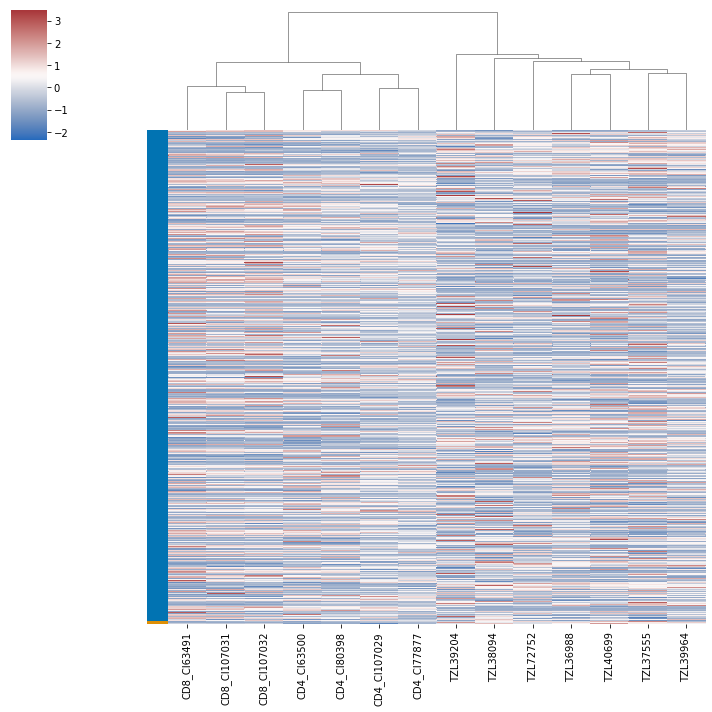

In [6]:
from sklearn import cluster
pal=sns.color_palette("colorblind")
#Readin data
rnas=pd.read_csv("https://raw.githubusercontent.com/evcon131/cs345finalp/main/rnaseqdata.csv")
#Select significantly differentially expressed genes, FDR threshold is .05
rnas=rnas[rnas["FDR_tzn_cd8"] < .05]
#Select only gene expression data
X=rnas.iloc[:,1:15]
y=cluster.KMeans(n_clusters=2, random_state=2).fit_predict(X)
rnas["cluster"]=y
rnas=rnas.sort_values(by="cluster")
rowsl=[]
for value in rnas["cluster"].values:
    index=int(value)
    rowsl.append(pal[index])
sns.clustermap(rnas.iloc[:,1:15],
               z_score=0, 
               cmap="vlag",
               row_colors=rowsl,
               row_cluster=False,
               yticklabels=False)

The colors on the left side of the heatmap show the cluster assignment. There seem to only be a few genes separating into their own cluster. I tried removing them and clustering again. 

/usr/local/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


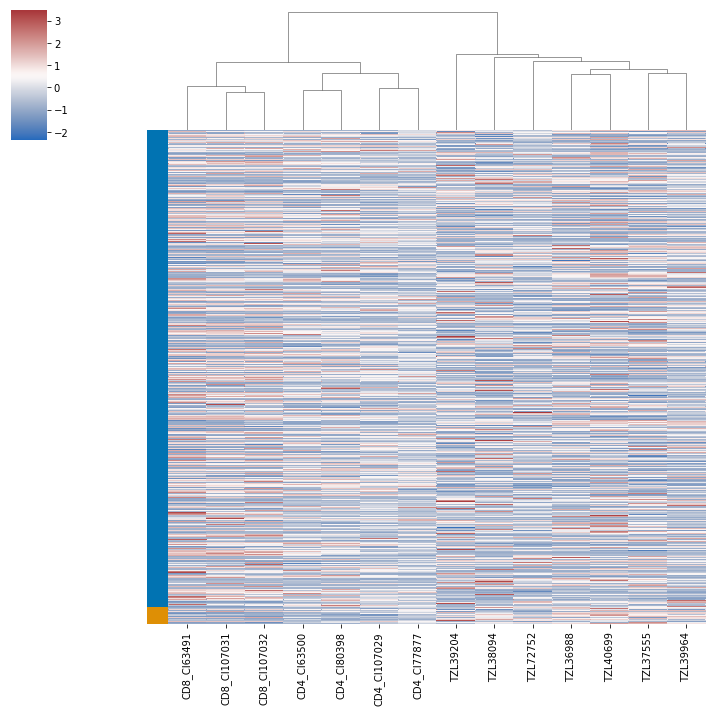

In [123]:
rnas=rnas[rnas["cluster"] != 1]
X=rnas.iloc[:,1:15]
y=cluster.KMeans(n_clusters=2, random_state=2).fit_predict(X)
rnas["cluster"]=y
rnas=rnas.sort_values(by="cluster")
rowsl=[]
for value in rnas["cluster"].values:
    index=int(value)
    rowsl.append(pal[index])
sns.clustermap(rnas.iloc[:,1:15],
               z_score=0, 
               cmap="vlag",
               row_colors=rowsl,
               row_cluster=False,
               yticklabels=False)

This made the second cluster bigger but it is still quite small. I removed those genes again and reclustered with 3 clusters so I would have more than a binary classification.

/usr/local/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


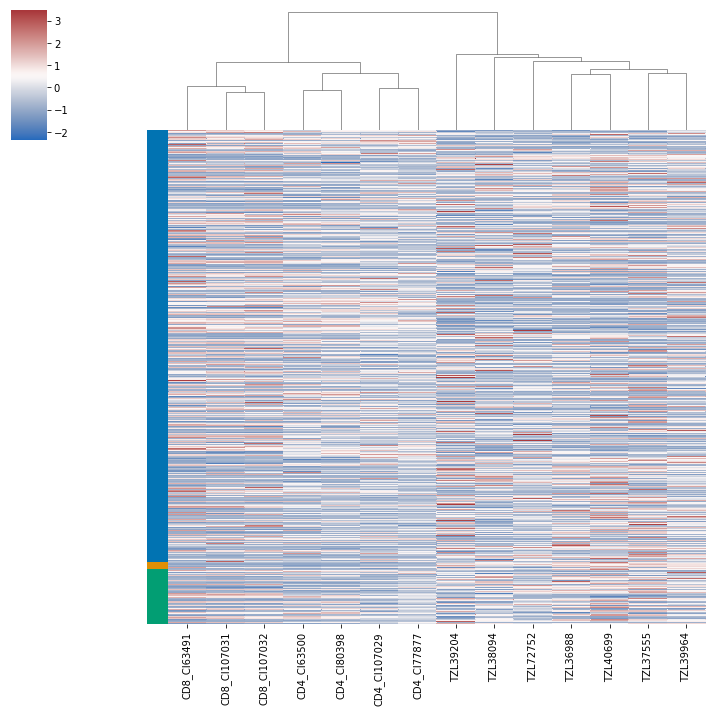

In [7]:
rnas=rnas[rnas["cluster"] != 1]
X=rnas.iloc[:,1:15]
y=cluster.KMeans(n_clusters=3, random_state=2).fit_predict(X)
rnas["cluster"]=y
rnas=rnas.sort_values(by="cluster")
rowsl=[]
for value in rnas["cluster"].values:
    index=int(value)
    rowsl.append(pal[index])
sns.clustermap(rnas.iloc[:,1:15],
               z_score=0, 
               cmap="vlag",
               row_colors=rowsl,
               row_cluster=False,
               yticklabels=False)

# Classifier Training
Now that I have labels, I moved onto training classifiers. First I used K-nearest neighbor and I treated K as a hyperparameter.

{'n_neighbors': 13}
The highest accuracy was: 0.9944108761329306


Text(0.5, 1.0, 'Accuracy for Different Values of K')

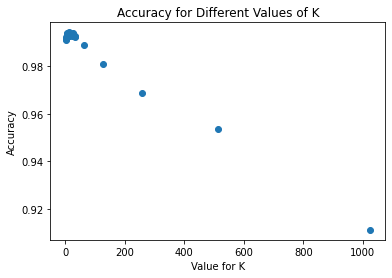

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

X=rnas.iloc[:,1:15]
y=rnas["cluster"].values
#Generating Ks to try for K nearest neigbor
kntest=[]
for i in range(1,32):
    kntest.append(i)
for i in range(5,11):
    kntest.append(2**i)

#Creating grid for testing KNN
param_grid = {'n_neighbors': kntest}
#Using cross validation to find optimum K
cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
knclass = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv)
knclass.fit(X, y)
print(knclass.best_params_)
print("The highest accuracy was: "+str(knclass.best_score_))
plt.scatter(x=kntest, y=knclass.cv_results_['mean_test_score'])
plt.xlabel("Value for K")
plt.ylabel("Accuracy")
plt.title("Accuracy for Different Values of K")

# Random Forest Classifier

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
accuracy = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
classifier.fit(X,y)
print("Random Forest Accuracy: "+str(np.mean(accuracy)))

Random Forest Accuracy: 0.9904833836858005


Surprisingly the K Nearest neighbor generated the highest accuracy. However, both classifiers performed with a high degree of accuracy. In order to generate labels I tried `sklearn.cluster.SpectralClustering` , `DBSCAN`, `OPTICS`, and `Birch`. Unfortunately none of them converged on more than 1 cluster. Thus I settled on my K-means method. Next I ran the classifiers on nanostring gene expression data to see if the classifiers had similar performance.

## Applying classifiers to nanostring data
I wanted to see if classifiers trained on RNA-srq data could classify nanostring data


In [13]:
#Load in nanostring data
nanostring=pd.read_csv("https://raw.githubusercontent.com/evcon131/cs345finalp/main/nanostring.csv")
#Gene names are mixed case so I need to convert to upper case so they match RNAseq data
nanostring["Gene Name"]=nanostring["Gene Name"].str.upper()
#Extract expression data that is the same design as the RNA-seq data 
nsmatch=nanostring.iloc[:,[0,8,9,10,3,4,5,6,28,29,30,31,32,33,34]]
#Merge nanostring and RNA-seq data by gene symbol
nsmatch=nsmatch.merge(rnas, left_on="Gene Name", right_on="uniprot_sym")
#Remove rows that didn't match 
nsmatch=nsmatch.dropna(subset=["Gene Name"])
#Predict based on nanostring data using random forest trained on RNA-seq
y_rf=classifier.predict(nsmatch.iloc[:,1:15])
print("Random forest accuracy on nanostring data: "+str(np.mean(y_rf==nsmatch["cluster"].values)))
#Predict based on nanostring data using K-nearest neighbor trained on RNA-seq
y_knn=knclass.predict(nsmatch.iloc[:,1:15])
print("K-nearest neighbor accuracy on nanostring data: "+str(np.mean(y_knn==nsmatch["cluster"].values)))

Random forest accuracy on nanostring data: 0.7142857142857143
K-nearest neighbor accuracy on nanostring data: 0.7272727272727273


The accuracy was much lower on nanostring data. There are multiple reasons the accuracies were much lower. The foremost is that the data were collected in different ways. Nanostring is biased in that you must select genes to assay for, while RNA-seq is unbiased. Training on an unbiased technique and testing on a biased technique can result in disparate data.  In addition, the processing of the RNA-seq data could have been too convoluted to extrapolate to other datasets. Since the RNA-seq data didn't cluster well, applying it to other datasets would also be hard.